In [6]:
import pandas as pd
import numpy as np
tayko = pd.read_csv('Tayko.csv')

In [7]:
tayko.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [8]:
attr = tayko.values
print tayko.columns.values

['sequence_number' 'US' 'source_a' 'source_c' 'source_b' 'source_d'
 'source_e' 'source_m' 'source_o' 'source_h' 'source_r' 'source_s'
 'source_t' 'source_u' 'source_p' 'source_x' 'source_w' 'Freq'
 'last_update_days_ago' '1st_update_days_ago' 'Web order' 'Gender=male'
 'Address_is_res' 'Purchase' 'Spending']


In [9]:
print attr.shape

(2000L, 25L)


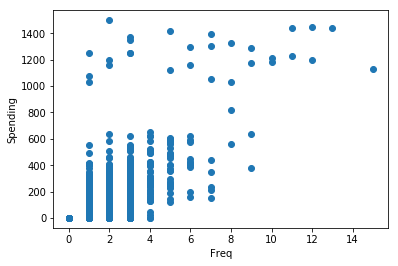

In [37]:
#Question 1
from matplotlib import pyplot as plt
plt.scatter(attr[:,17],attr[:,-1])
plt.xlabel("Freq")
plt.ylabel('Spending')
plt.show()

In [16]:
select_index = [17, 18, 20, 21, 22, 1]
tayko_X = attr[:,select_index]
tayko_y = attr[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
train_test_split(tayko_X,tayko_y, test_size = 0.25, random_state = 1)

In [23]:
print y_valid.shape
print X_valid.shape
print X_train.shape

(500L,)
(500L, 6L)
(1500L, 6L)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # this initialize the object and assign it to variable 'model'

In [21]:
model.fit(X_train, y_train)

np.set_printoptions( precision = 4, suppress= True ) # 4 digits after . and suppress scientific notation

print model.coef_ #beta 1, beta 2, etc. stored here
print '%.4f' % model.intercept_ #this is the slope the stuff begining tells python to format the numbers 

[ 90.9795  -0.0088  18.6232  -6.5609 -77.4037  -3.6309]
5.2257


In [24]:
# Make prediction on validation set
y_pred = model.predict(X_valid)
print y_pred.shape

(500L,)


In [44]:
# Compute RMSE for validation set
e = y_valid - y_pred

# RMSE
rmse = np.sqrt(np.mean(e ** 2))
print 'Validation RMSE:', '%.4f' % rmse


y_pred_train = model.predict ( X_train )
e_train = y_train - y_pred_train
rmse_train = np.sqrt(np.mean(e_train**2))
print 'Train RMSE:', '%.4f' % rmse_train

Validation RMSE: 156.9419
Train RMSE: 120.1899
